In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, accuracy_score, classification_report, 
                           confusion_matrix, roc_curve, ConfusionMatrixDisplay)

# Modelos
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [2]:
try:
    df = pd.read_csv("heart.csv")
    print("Dataset cargado correctamente")
except:
    print("No se pudo cargar el dataset")
    raise

print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de features: {df.shape[1] - 1}")
print(f"Número de instancias: {df.shape[0]}")

# Detectar columna target
def detect_target_column(df):
    possible_targets = ['HeartDisease', 'target', 'disease', 'class', 'output']
    for col in possible_targets:
        if col in df.columns:
            return col
    return df.columns[-1]

target_column = detect_target_column(df)
print(f"Columna target detectada: '{target_column}'")

print("\n1ras 5 filas:")
display(df.head())

print("\nÚltimas 5 filas:")
display(df.tail())

Dataset cargado correctamente
Dimensiones del dataset: (918, 12)
Número de features: 11
Número de instancias: 918
Columna target detectada: 'HeartDisease'

1ras 5 filas:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Últimas 5 filas:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


INFORMACIÓN GENERAL:
Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Estadísticas descriptivas:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Distribución de la variable target:
HeartDisease
1    508
0    410
Name: count, dtype: int64


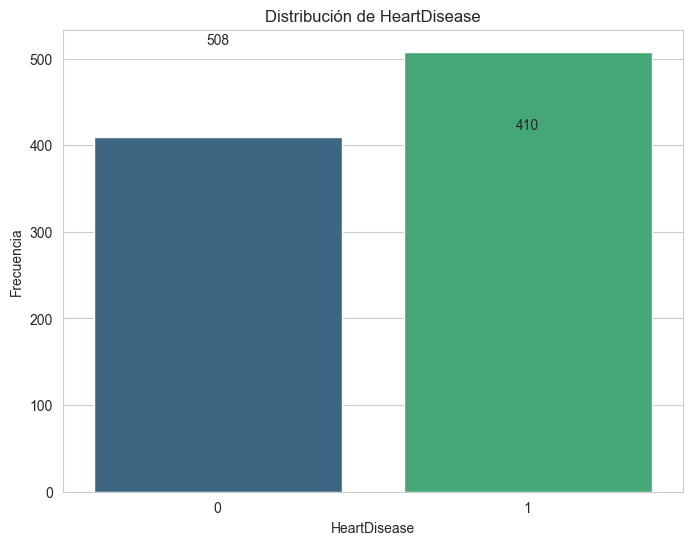

In [3]:
print("INFORMACIÓN GENERAL:")
print("Tipos de datos y valores nulos:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nDistribución de la variable target:")
target_dist = df[target_column].value_counts()
print(target_dist)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=target_column, palette='viridis')
plt.title(f'Distribución de {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frecuencia')
for i, count in enumerate(target_dist):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()


ANÁLISIS DE VARIABLES NUMÉRICAS:
Variables numéricas (7): ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Variables categóricas (5): ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


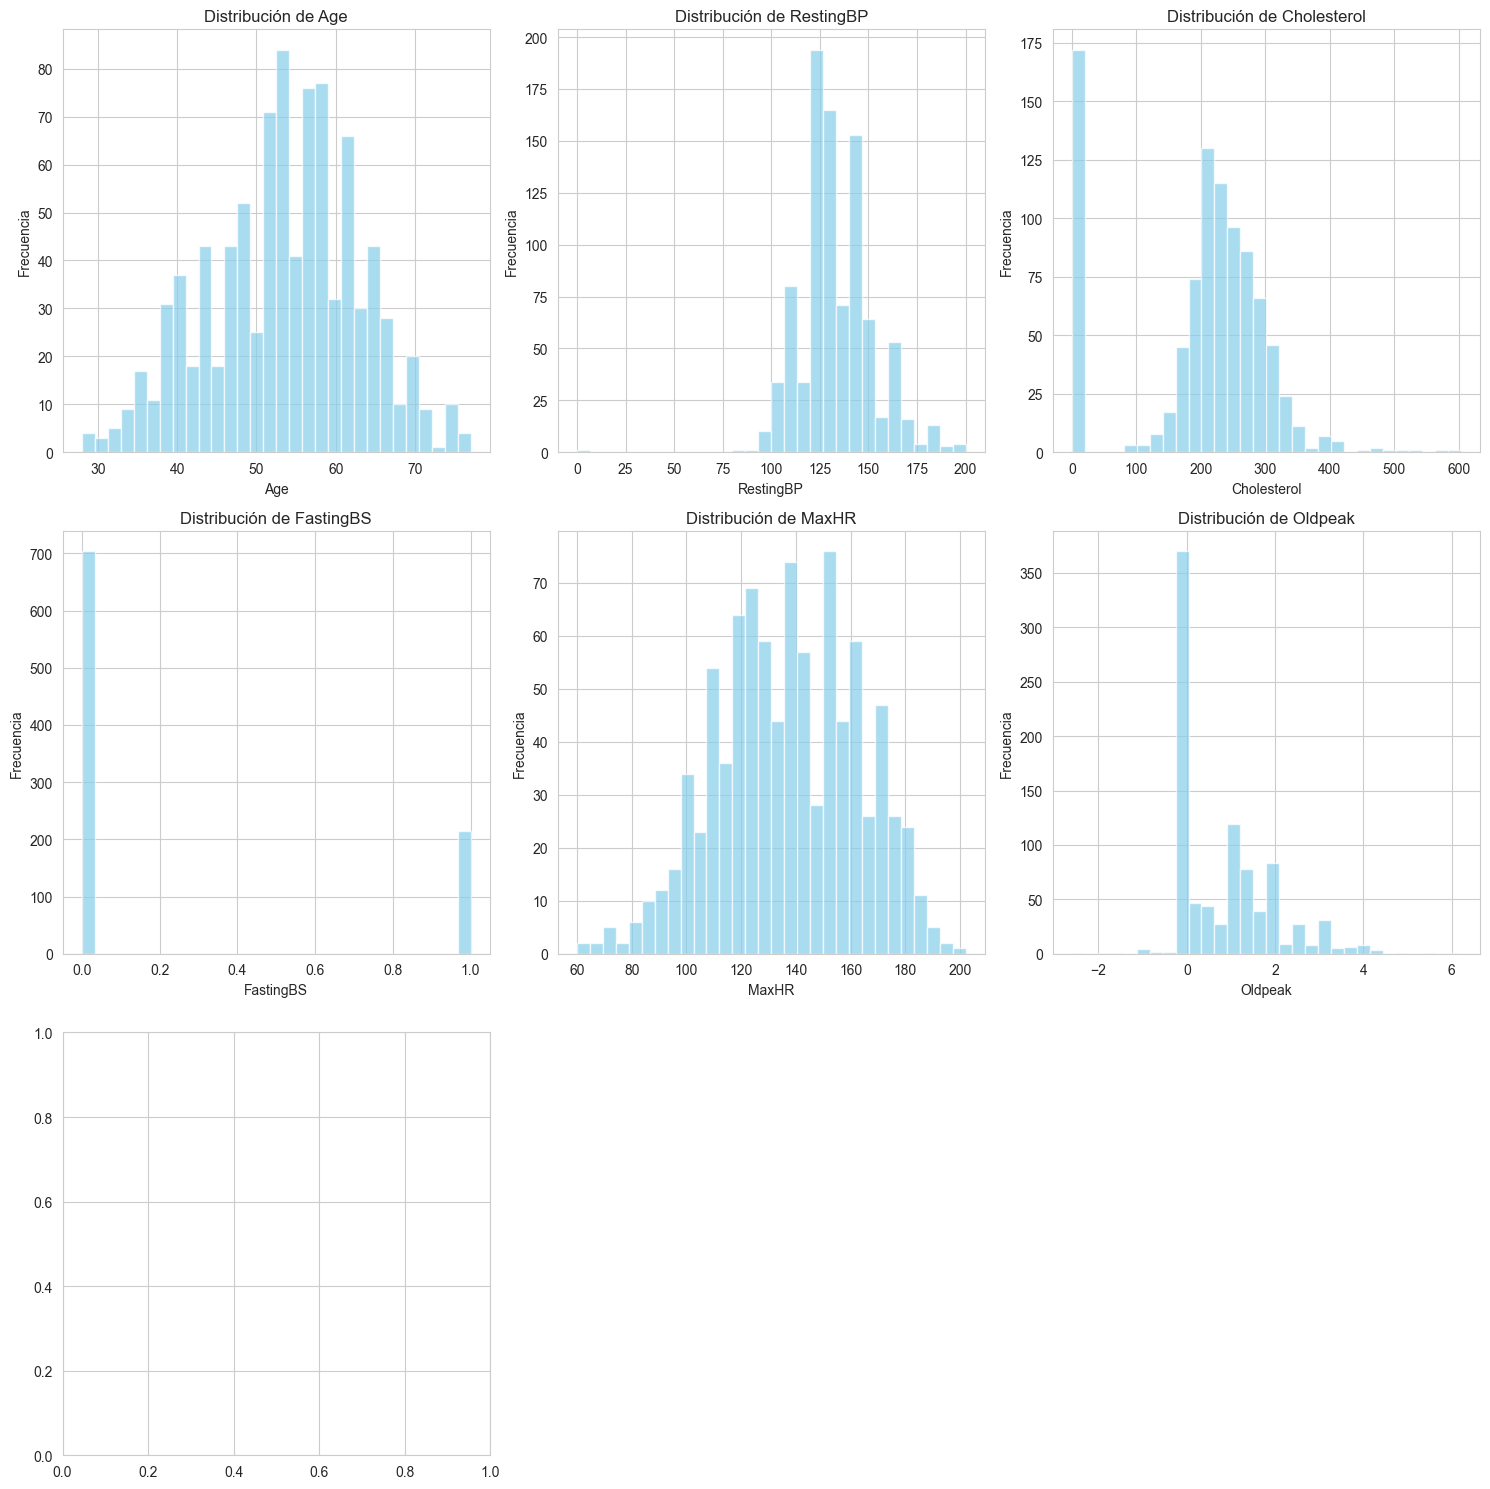

In [4]:
print("\nANÁLISIS DE VARIABLES NUMÉRICAS:")
# Separar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols}")

# Histogramas de variables numéricas
if numeric_cols:
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if col != target_column:  # Excluir target
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
    
    # Ocultar ejes vacíos
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


ANÁLISIS DE VARIABLES CATEGÓRICAS:


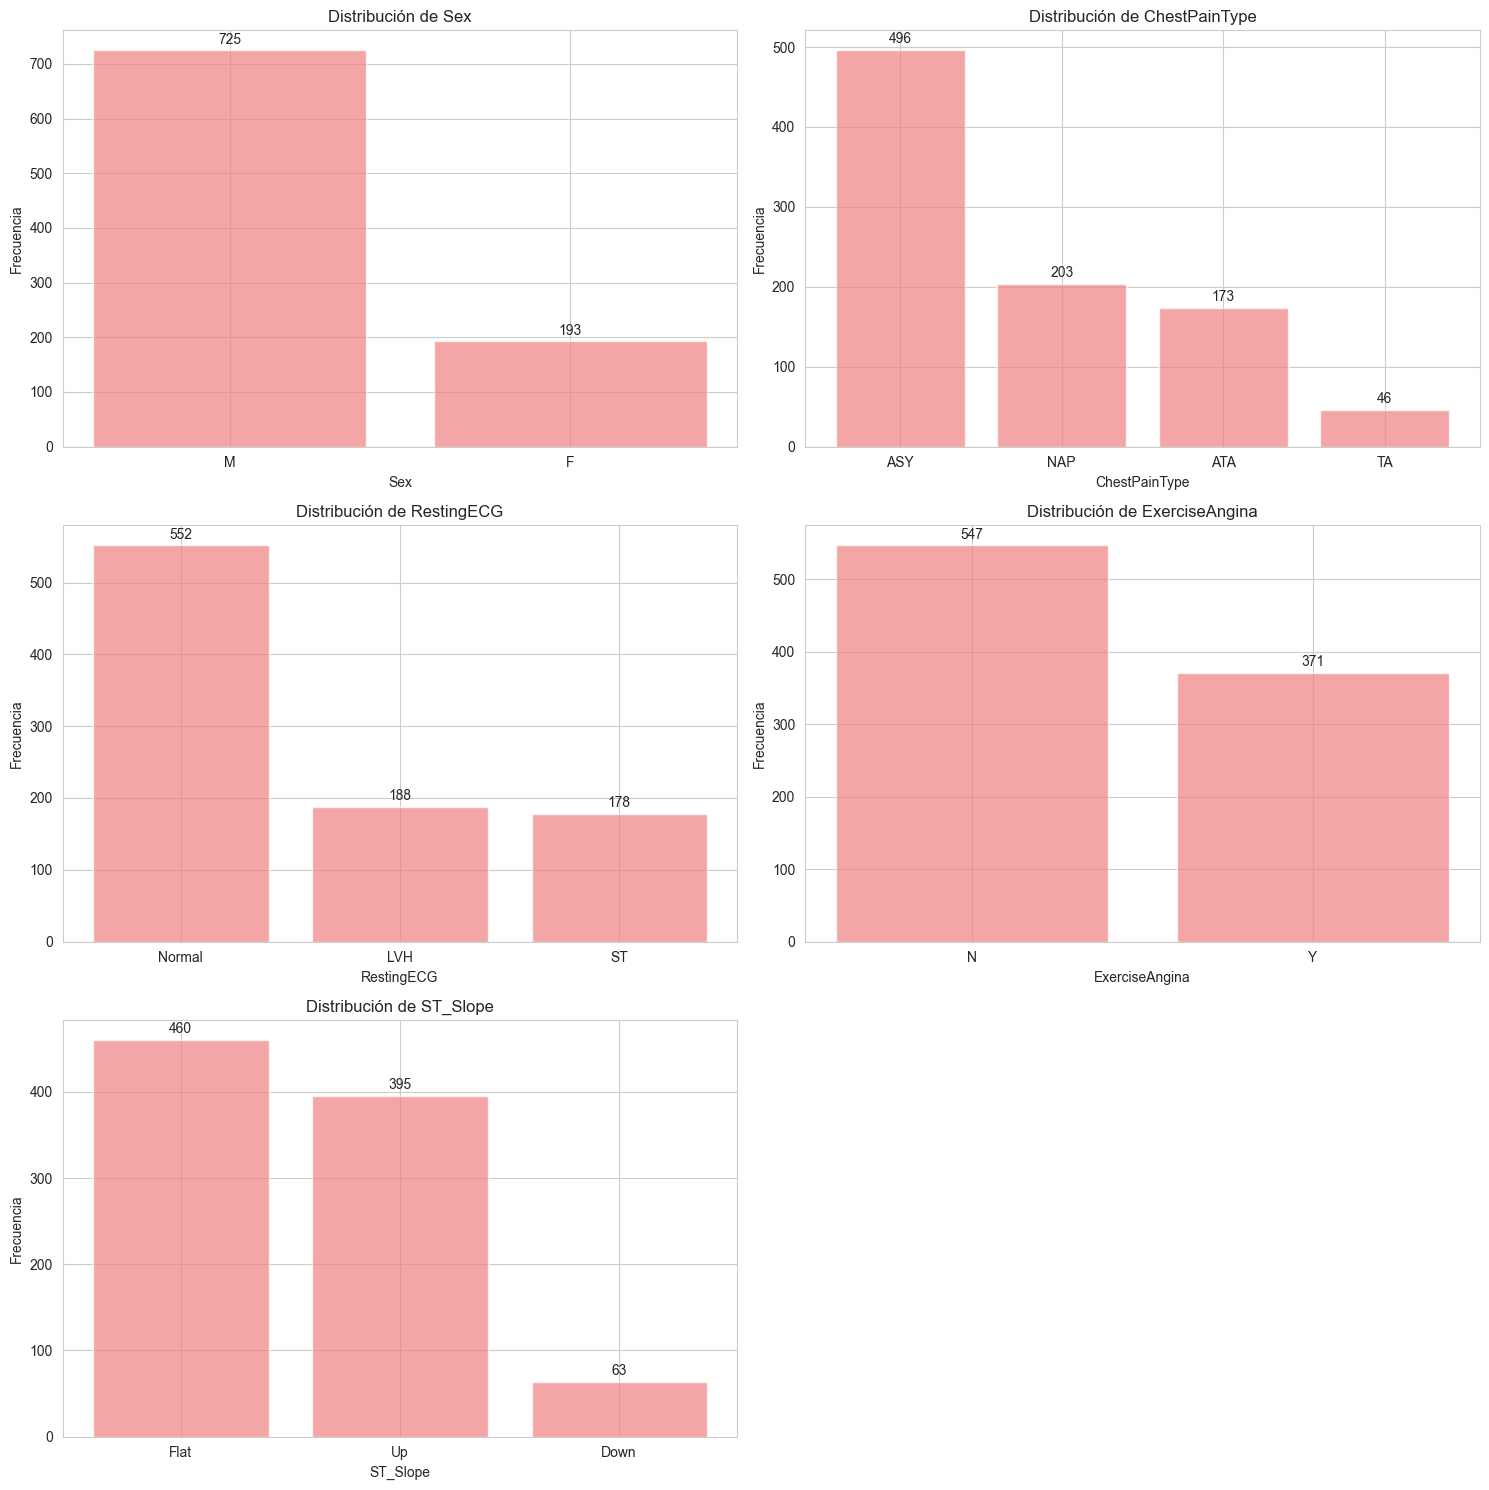


Valores únicos por variable categórica:
   Sex: ['M', 'F']
   ChestPainType: ['ATA', 'NAP', 'ASY', 'TA']
   RestingECG: ['Normal', 'ST', 'LVH']
   ExerciseAngina: ['N', 'Y']
   ST_Slope: ['Up', 'Flat', 'Down']


In [5]:
print("\nANÁLISIS DE VARIABLES CATEGÓRICAS:")
if categorical_cols:
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        if i < len(axes):
            value_counts = df[col].value_counts()
            bars = axes[i].bar(value_counts.index, value_counts.values, color='lightcoral', alpha=0.7)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            
            # Añadir valores en las barras
            for j, count in enumerate(value_counts.values):
                axes[i].text(j, count + 5, str(count), ha='center', va='bottom')
    
    # Ocultar ejes vacíos
    for i in range(len(categorical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # Mostrar valores únicos
    print("\nValores únicos por variable categórica:")
    for col in categorical_cols:
        unique_vals = df[col].unique()
        print(f"   {col}: {list(unique_vals)}")


ANÁLISIS DE CORRELACIONES:


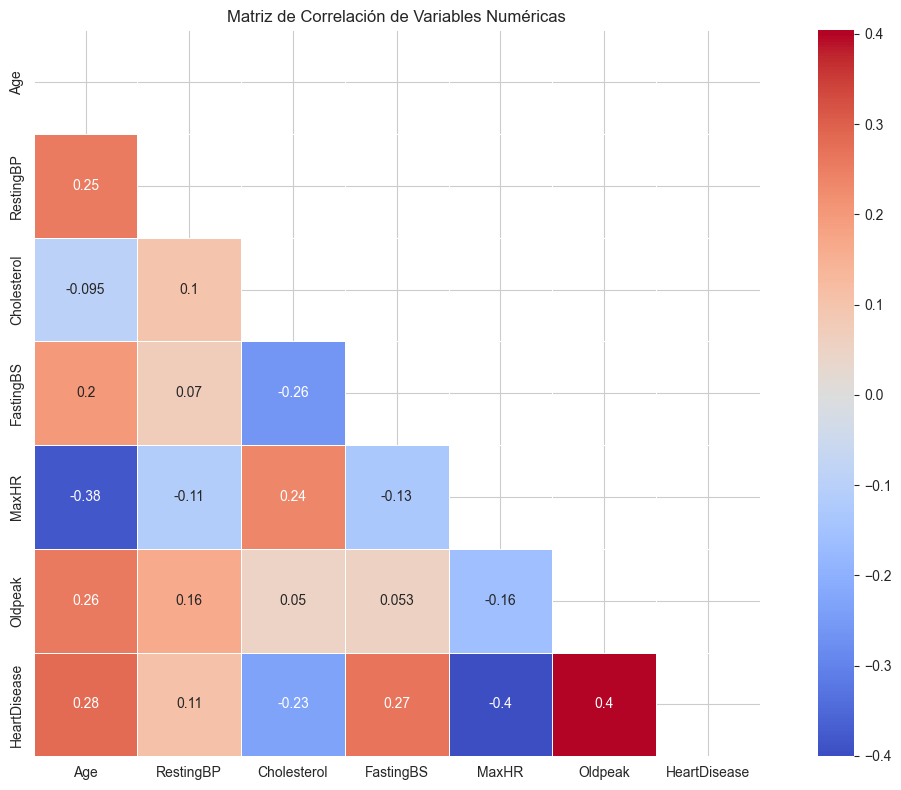


Correlaciones con la variable target:


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

In [6]:
print("\nANÁLISIS DE CORRELACIONES:")

# Matriz de correlación solo para variables numéricas
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numeric_cols].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlación de Variables Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Correlación con el target
    if target_column in numeric_cols:
        print("\nCorrelaciones con la variable target:")
        target_correlations = df[numeric_cols].corr()[target_column].sort_values(ascending=False)
        display(target_correlations)


5. RELACIÓN ENTRE VARIABLES Y TARGET:


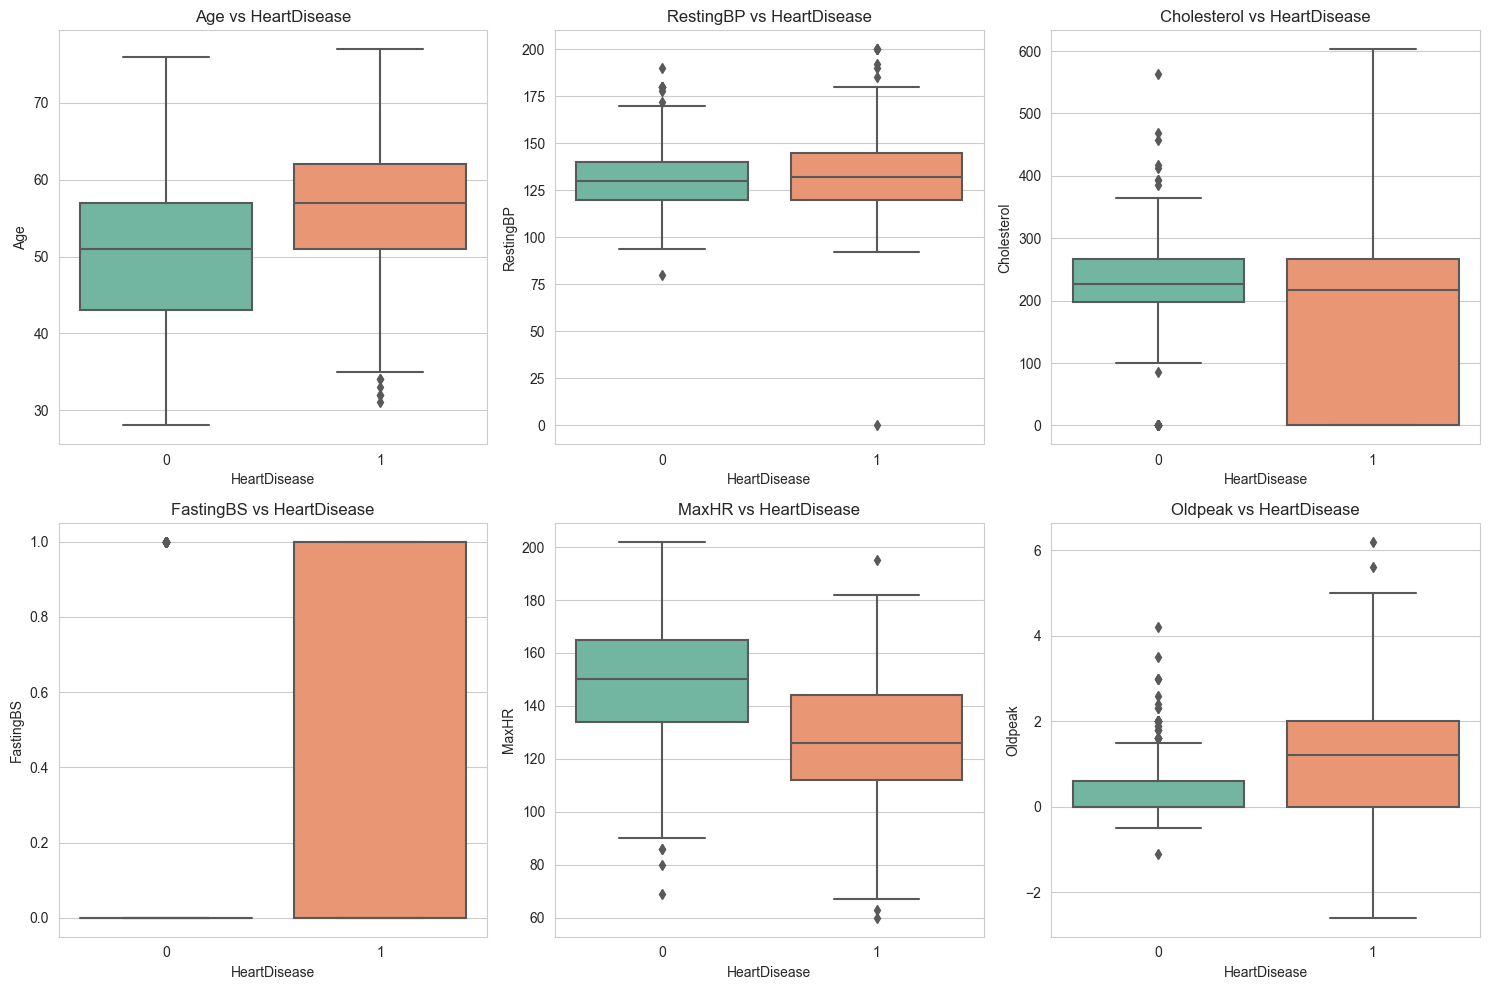

In [7]:
print("\n5. RELACIÓN ENTRE VARIABLES Y TARGET:")

# Boxplots para variables numéricas vs target
numeric_features = [col for col in numeric_cols if col != target_column]
if numeric_features and target_column in df.columns:
    n_cols = 3
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_features):
        if i < len(axes):
            sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette='Set2')
            axes[i].set_title(f'{col} vs {target_column}')
    
    # Ocultar ejes vacíos
    for i in range(len(numeric_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [8]:
print("\nPREPROCESAMIENTO DE DATOS:")
# Preparar features y target
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Shape de X: {X.shape}, Shape de y: {y.shape}")

# Aplicar one-hot encoding a variables categóricas
print("\nAplicando one-hot encoding...")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape después de encoding: {X_encoded.shape}")
print(f"Nuevas columnas: {list(X_encoded.columns)}")

# Mostrar nueva distribución
print(f"\nPrimeras 3 filas después del encoding:")
display(X_encoded.head(3))

X = X_encoded


PREPROCESAMIENTO DE DATOS:
Shape de X: (918, 11), Shape de y: (918,)

Aplicando one-hot encoding...
Shape después de encoding: (918, 15)
Nuevas columnas: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

Primeras 3 filas después del encoding:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True


In [9]:
# FUNCIONES REUTILIZABLES
def train_pipeline(X_train, y_train, model, param_grid, model_name):
    """
    Función reutilizable para entrenar modelos con Pipeline y GridSearchCV
    """
    # Seleccionar scaler según el modelo
    if model_name in ["SVC", "KNeighbors"]:
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    
    # Crear pipeline
    pipe = Pipeline([
        ("scaler", scaler),
        ("clf", model)
    ])
    
    # Configurar GridSearchCV
    grid = GridSearchCV(
        pipe, 
        param_grid, 
        cv=5, 
        scoring="roc_auc",
        n_jobs=-1,
        return_train_score=True
    )
    
    # Entrenar
    print(f"Entrenando {model_name}...")
    grid.fit(X_train, y_train)
    
    return grid

def evaluate_model(model, X_test, y_test, model_name):
    """
    Función reutilizable para evaluar modelos
    """
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    return auc, accuracy, y_pred_proba, y_pred

def plot_metrics_comparison(results_dict):
    """
    Función para visualizar comparación de modelos
    """
    models = list(results_dict.keys())
    auc_scores = [results_dict[m]["auc"] for m in models]
    acc_scores = [results_dict[m]["accuracy"] for m in models]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de AUC
    bars1 = ax1.barh(models, auc_scores, color='skyblue')
    ax1.set_xlabel('AUC Score')
    ax1.set_title('Comparación de AUC por Modelo')
    ax1.set_xlim(0, 1)
    
    for bar, value in zip(bars1, auc_scores):
        ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center')
    
    # Gráfico de Accuracy
    bars2 = ax2.barh(models, acc_scores, color='lightcoral')
    ax2.set_xlabel('Accuracy Score')
    ax2.set_title('Comparación de Accuracy por Modelo')
    ax2.set_xlim(0, 1)
    
    for bar, value in zip(bars2, acc_scores):
        ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()

In [10]:
print("\nDEMOSTRACIÓN DE DATA LEAKAGE")
# Crear variable con data leakage
np.random.seed(42)
X_leaky = X.copy()
X_leaky["leaky_feature"] = y + np.random.normal(0, 0.01, size=len(y))

print(f"Variable con data leakage creada")
print(f"Correlación leaky_feature con target: {X_leaky['leaky_feature'].corr(y):.4f}")
print(f"Shape de X_leaky: {X_leaky.shape}")


DEMOSTRACIÓN DE DATA LEAKAGE
Variable con data leakage creada
Correlación leaky_feature con target: 0.9998
Shape de X_leaky: (918, 16)


In [11]:
print("FLUJO CON DATA LEAKAGE (INCORRECTO)")

# ERROR: Escalar ANTES de dividir
scaler = MinMaxScaler()
X_scaled_leaky = scaler.fit_transform(X_leaky)

# Dividir después de escalar - ¡INCORRECTO!
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_scaled_leaky, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Conjuntos de datos CON data leakage:")
print(f"   Training: {X_train_l.shape}")
print(f"   Test: {X_test_l.shape}")

# Entrenar modelo con data leakage
model_leaky = SVC(probability=True, random_state=42)
param_grid_leaky = {"C": [0.1, 1, 10], "gamma": [0.01, 0.1]}

grid_leaky = GridSearchCV(
    model_leaky, param_grid_leaky, cv=5, scoring="roc_auc", n_jobs=-1
)
grid_leaky.fit(X_train_l, y_train_l)

# Evaluar con data leakage
y_pred_proba_leaky = grid_leaky.predict_proba(X_test_l)[:, 1]
auc_leaky = roc_auc_score(y_test_l, y_pred_proba_leaky)
accuracy_leaky = accuracy_score(y_test_l, grid_leaky.predict(X_test_l))

print(f"Resultados CON data leakage:")
print(f"   Mejores parámetros: {grid_leaky.best_params_}")
print(f"   AUC: {auc_leaky:.4f}")
print(f"   Accuracy: {accuracy_leaky:.4f}")

FLUJO CON DATA LEAKAGE (INCORRECTO)
Conjuntos de datos CON data leakage:
   Training: (734, 16)
   Test: (184, 16)
Resultados CON data leakage:
   Mejores parámetros: {'C': 0.1, 'gamma': 0.1}
   AUC: 1.0000
   Accuracy: 1.0000


In [12]:
print("FLUJO SIN DATA LEAKAGE (CORRECTO)")

# Dividir ANTES de cualquier preprocesamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Conjuntos de datos SIN data leakage:")
print(f"   Training: {X_train.shape}")
print(f"   Test: {X_test.shape}")
print(f"   Proporción en train: {y_train.value_counts(normalize=True).values}")
print(f"   Proporción en test: {y_test.value_counts(normalize=True).values}")

# Entrenar SVC correctamente con Pipeline
svc_model = SVC(probability=True, random_state=42)
svc_params = {"clf__C": [0.1, 1, 10], "clf__gamma": [0.01, 0.1, 1]}

grid_svc = train_pipeline(X_train, y_train, svc_model, svc_params, "SVC")
auc_svc, acc_svc, y_proba_svc, y_pred_svc = evaluate_model(grid_svc, X_test, y_test, "SVC")

print(f"Resultados SIN data leakage:")
print(f"   Mejores parámetros: {grid_svc.best_params_}")
print(f"   AUC: {auc_svc:.4f}")
print(f"   Accuracy: {acc_svc:.4f}")

FLUJO SIN DATA LEAKAGE (CORRECTO)
Conjuntos de datos SIN data leakage:
   Training: (734, 15)
   Test: (184, 15)
   Proporción en train: [0.55313351 0.44686649]
   Proporción en test: [0.55434783 0.44565217]
Entrenando SVC...
Resultados SIN data leakage:
   Mejores parámetros: {'clf__C': 10, 'clf__gamma': 0.1}
   AUC: 0.9311
   Accuracy: 0.8641


COMPARACIÓN: DATA LEAKAGE vs FLUJO CORRECTO
    Métrica  Con Data Leakage  Sin Data Leakage  Diferencia
0       AUC               1.0          0.931133    0.068867
1  Accuracy               1.0          0.864130    0.135870

Conclusión: El data leakage infla el AUC en 0.0689


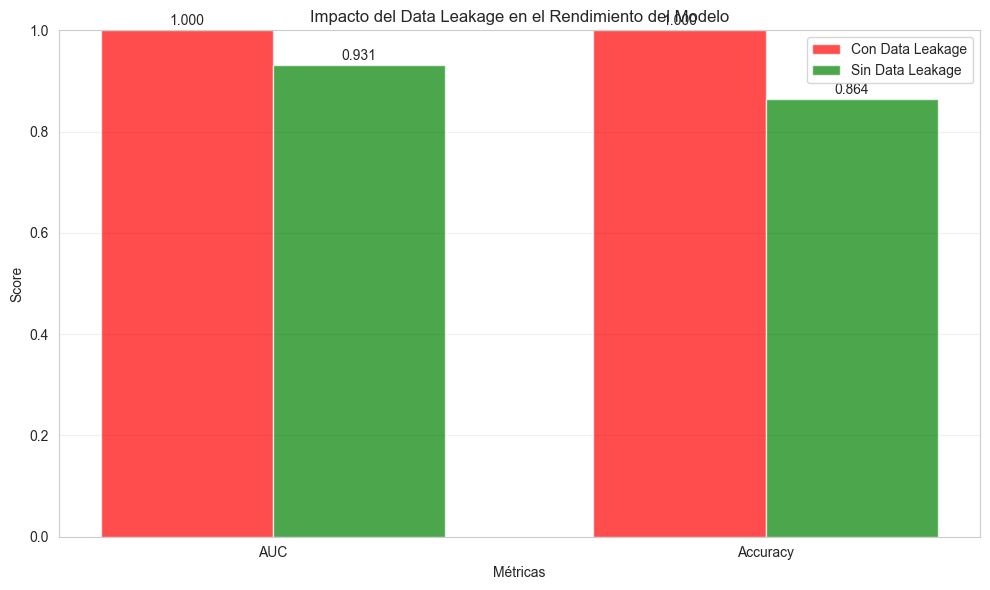

In [13]:
print("COMPARACIÓN: DATA LEAKAGE vs FLUJO CORRECTO")

comparison_data = {
    "Métrica": ["AUC", "Accuracy"],
    "Con Data Leakage": [auc_leaky, accuracy_leaky],
    "Sin Data Leakage": [auc_svc, acc_svc],
    "Diferencia": [auc_leaky - auc_svc, accuracy_leaky - acc_svc]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

print(f"\nConclusión: El data leakage infla el AUC en {auc_leaky - auc_svc:.4f}")

# Visualización de la comparación
plt.figure(figsize=(10, 6))
metrics = ['AUC', 'Accuracy']
leaky_scores = [auc_leaky, accuracy_leaky]
correct_scores = [auc_svc, acc_svc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, leaky_scores, width, label='Con Data Leakage', color='red', alpha=0.7)
plt.bar(x + width/2, correct_scores, width, label='Sin Data Leakage', color='green', alpha=0.7)

plt.xlabel('Métricas')
plt.ylabel('Score')
plt.title('Impacto del Data Leakage en el Rendimiento del Modelo')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(leaky_scores):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center')
for i, v in enumerate(correct_scores):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [14]:
print("\nCONFIGURACIÓN DE MÚLTIPLES MODELOS")
models_config = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__solver": ["liblinear"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "clf__n_estimators": [50, 100],
            "clf__max_depth": [3, 5, None],
            "clf__min_samples_split": [2, 5]
        }
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "clf__n_neighbors": [3, 5, 7, 9]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "clf__n_estimators": [50, 100],
            "clf__learning_rate": [0.1, 0.05],
            "clf__max_depth": [3, 4]
        }
    },
    "SVC": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__gamma": [0.01, 0.1, 1]
        }
    }
}

print("Modelos configurados para comparación:")
for i, model_name in enumerate(models_config.keys(), 1):
    print(f"   {i}. {model_name}")


CONFIGURACIÓN DE MÚLTIPLES MODELOS
Modelos configurados para comparación:
   1. LogisticRegression
   2. RandomForest
   3. KNeighbors
   4. GradientBoosting
   5. SVC


In [15]:
print("ENTRENANDO TODOS LOS MODELOS CON PIPELINE")
results = {}

for name, config in models_config.items():
    print(f"\nProcesando {name}...")
    
    try:
        # Entrenar modelo con pipeline
        grid = train_pipeline(X_train, y_train, config["model"], config["params"], name)
        
        # Evaluar modelo
        auc, accuracy, y_proba, y_pred = evaluate_model(grid, X_test, y_test, name)
        
        # Guardar resultados
        results[name] = {
            "model": grid,
            "auc": auc,
            "accuracy": accuracy,
            "best_params": grid.best_params_,
            "y_proba": y_proba,
            "y_pred": y_pred,
            "best_score": grid.best_score_
        }
        
        print(f"   {name} - AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")
        print(f"    Mejores parámetros: {grid.best_params_}")
        
    except Exception as e:
        print(f"   Error en {name}: {e}")

print(f"\nEntrenamiento completado: {len(results)}/{len(models_config)} modelos exitosos")

ENTRENANDO TODOS LOS MODELOS CON PIPELINE

Procesando LogisticRegression...
Entrenando LogisticRegression...
   LogisticRegression - AUC: 0.9320, Accuracy: 0.8859
    Mejores parámetros: {'clf__C': 0.1, 'clf__solver': 'liblinear'}

Procesando RandomForest...
Entrenando RandomForest...
   RandomForest - AUC: 0.9320, Accuracy: 0.8587
    Mejores parámetros: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

Procesando KNeighbors...
Entrenando KNeighbors...
   KNeighbors - AUC: 0.9333, Accuracy: 0.8804
    Mejores parámetros: {'clf__n_neighbors': 9}

Procesando GradientBoosting...
Entrenando GradientBoosting...
   GradientBoosting - AUC: 0.9372, Accuracy: 0.8913
    Mejores parámetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 50}

Procesando SVC...
Entrenando SVC...
   SVC - AUC: 0.9311, Accuracy: 0.8641
    Mejores parámetros: {'clf__C': 10, 'clf__gamma': 0.1}

Entrenamiento completado: 5/5 modelos exitosos


In [16]:
print("RANKING DE MODELOS (Ordenado por AUC)")

# Crear DataFrame comparativo
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        "Model": name,
        "AUC": result["auc"],
        "Accuracy": result["accuracy"],
        "Best_Score_CV": result["best_score"],
        "Best_Params": str(result["best_params"])
    })

ranking_df = pd.DataFrame(comparison_data)
ranking_df = ranking_df.sort_values("AUC", ascending=False)
ranking_df.reset_index(drop=True, inplace=True)

# Mostrar ranking
display(ranking_df.style.background_gradient(subset=['AUC', 'Accuracy'], cmap='YlOrBr'))

# Mostrar mejor modelo
best_model = ranking_df.iloc[0]
print(f"\nMEJOR MODELO: {best_model['Model']}")
print(f"   AUC: {best_model['AUC']:.4f}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   Best CV Score: {best_model['Best_Score_CV']:.4f}")

RANKING DE MODELOS (Ordenado por AUC)


,Model,AUC,Accuracy,Best_Score_CV,Best_Params
0,GradientBoosting,0.937171,0.891304,0.928145,"{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 50}"
1,KNeighbors,0.933286,0.880435,0.908419,{'clf__n_neighbors': 9}
2,LogisticRegression,0.931970,0.885870,0.921806,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}"
3,RandomForest,0.931970,0.858696,0.923762,"{'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}"
4,SVC,0.931133,0.864130,0.919844,"{'clf__C': 10, 'clf__gamma': 0.1}"



MEJOR MODELO: GradientBoosting
   AUC: 0.9372
   Accuracy: 0.8913
   Best CV Score: 0.9281


VISUALIZACIÓN DE RESULTADOS


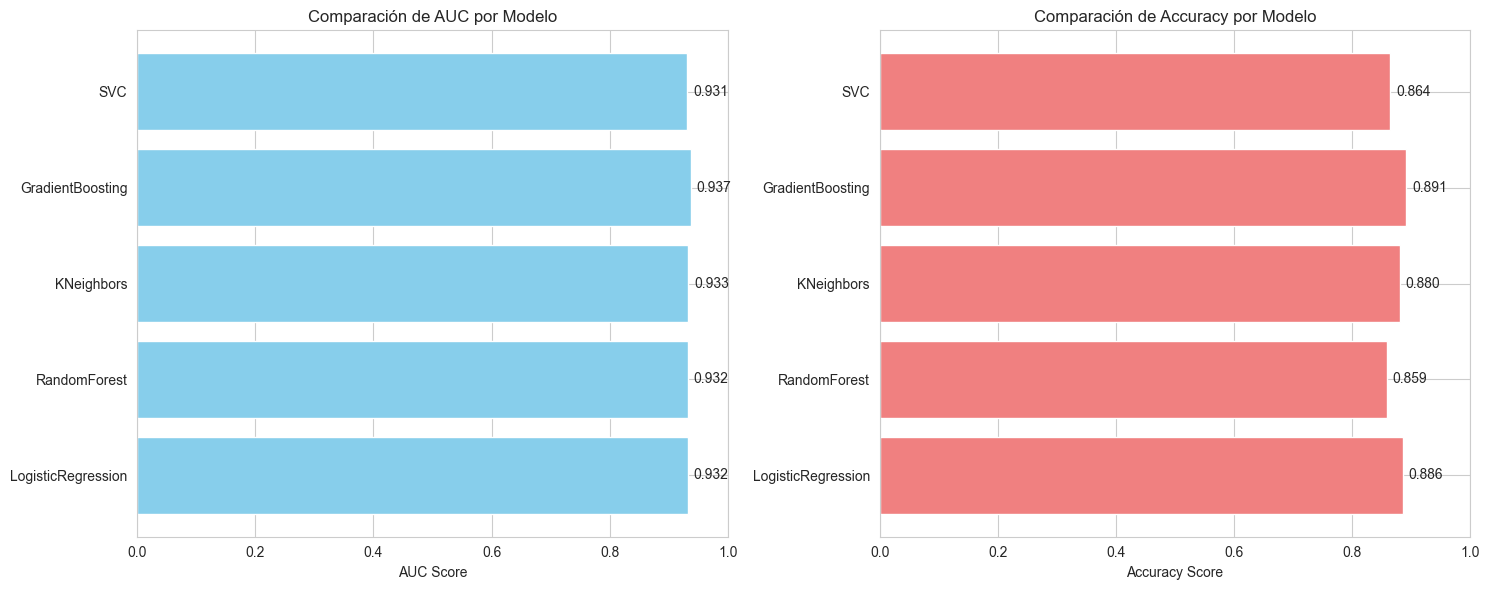


CURVAS ROC COMPARATIVAS


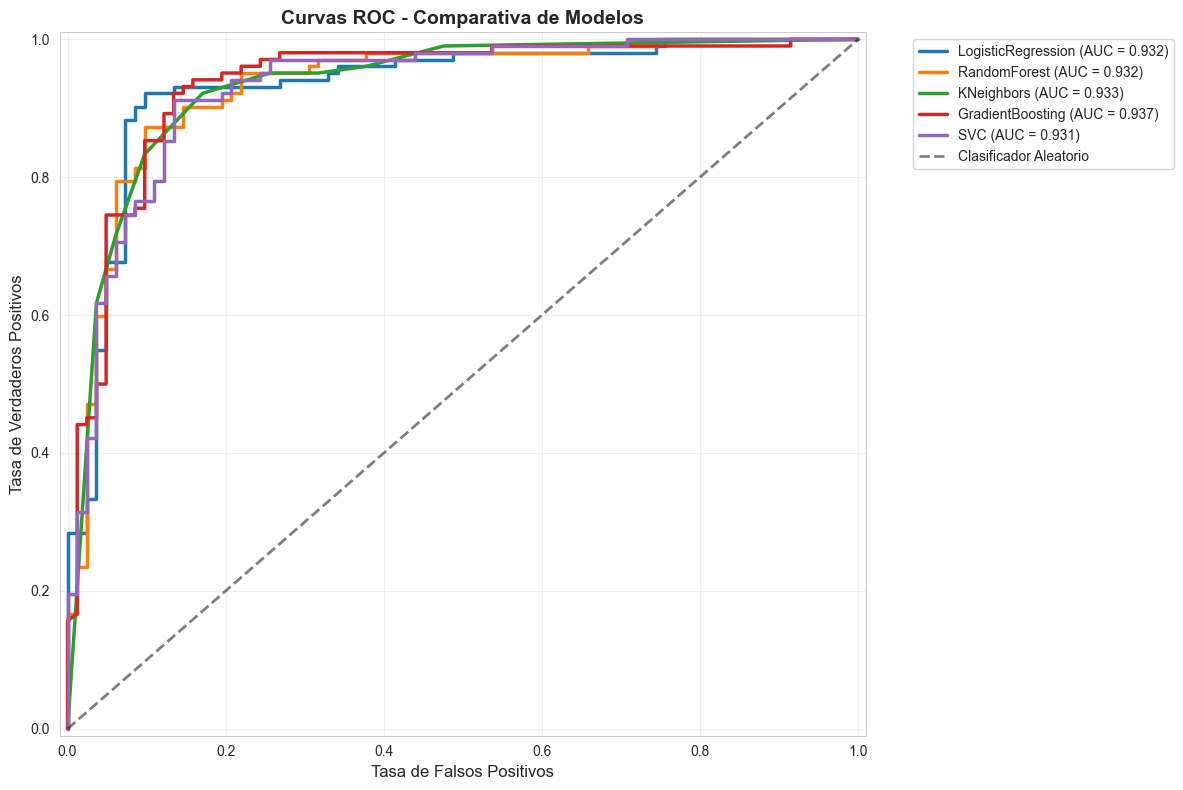

In [17]:
print("VISUALIZACIÓN DE RESULTADOS")

# 1. Gráfico de comparación de métricas
plot_metrics_comparison(results)

# 2. Curvas ROC comparativas
print("\nCURVAS ROC COMPARATIVAS")
plt.figure(figsize=(12, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result["y_proba"])
    auc = result["auc"]
    plt.plot(fpr, tpr, linewidth=2.5, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=2, label="Clasificador Aleatorio")
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC - Comparativa de Modelos', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.tight_layout()
plt.show()


MATRICES DE CONFUSIÓN POR MODELO


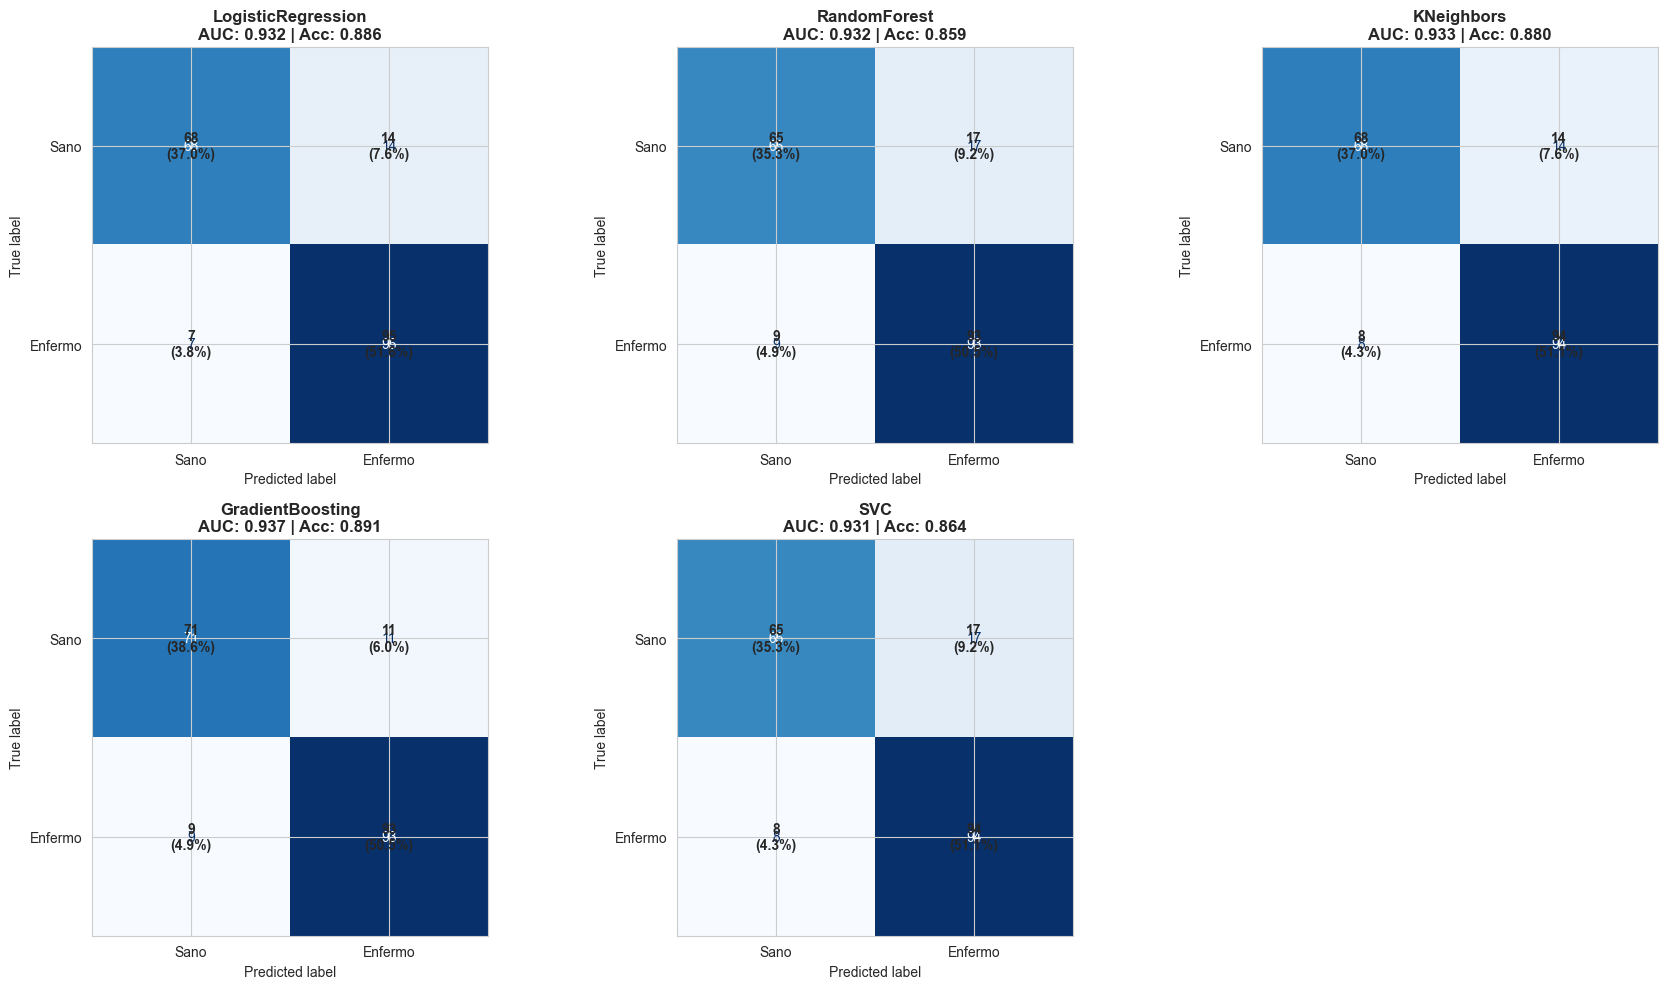

In [18]:
print("\nMATRICES DE CONFUSIÓN POR MODELO")

# Calcular número de filas y columnas para subplots
n_models = len(results)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
if n_models == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, (name, result) in enumerate(results.items()):
    if idx < len(axes):
        cm = confusion_matrix(y_test, result["y_pred"])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=['Sano', 'Enfermo'])
        disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
        axes[idx].set_title(f'{name}\nAUC: {result["auc"]:.3f} | Acc: {result["accuracy"]:.3f}', 
                          fontweight='bold')
        
        # Añadir anotaciones de porcentaje
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                axes[idx].text(j, i, f'{cm[i, j]}\n({cm[i, j]/cm.sum():.1%})',
                             ha='center', va='center', fontweight='bold')

# Ocultar ejes vacíos
for idx in range(len(results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [19]:
print("COMPARACIÓN DETALLADA POR MODELO")

# Crear tabla detallada
detailed_comparison = []
for name, result in results.items():
    # Calcular métricas adicionales
    y_pred = result["y_pred"]
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Métricas
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    detailed_comparison.append({
        'Model': name,
        'AUC': result["auc"],
        'Accuracy': result["accuracy"],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Specificity': specificity,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    })

detailed_df = pd.DataFrame(detailed_comparison)
detailed_df = detailed_df.sort_values('AUC', ascending=False)

# Mostrar tabla con formato
styled_df = detailed_df.style.background_gradient(subset=['AUC', 'Accuracy', 'F1-Score'], 
                                                cmap='YlGnBu', axis=0)
display(styled_df.format({
    'AUC': '{:.3f}',
    'Accuracy': '{:.3f}',
    'Precision': '{:.3f}',
    'Recall': '{:.3f}',
    'F1-Score': '{:.3f}',
    'Specificity': '{:.3f}'
}))

COMPARACIÓN DETALLADA POR MODELO


,Model,AUC,Accuracy,Precision,Recall,F1-Score,Specificity,TP,TN,FP,FN
3,GradientBoosting,0.937,0.891,0.894,0.912,0.903,0.866,93,71,11,9
2,KNeighbors,0.933,0.880,0.870,0.922,0.895,0.829,94,68,14,8
0,LogisticRegression,0.932,0.886,0.872,0.931,0.900,0.829,95,68,14,7
1,RandomForest,0.932,0.859,0.845,0.912,0.877,0.793,93,65,17,9
4,SVC,0.931,0.864,0.847,0.922,0.883,0.793,94,65,17,8



GRÁFICO RADAR DE MÉTRICAS MÚLTIPLES


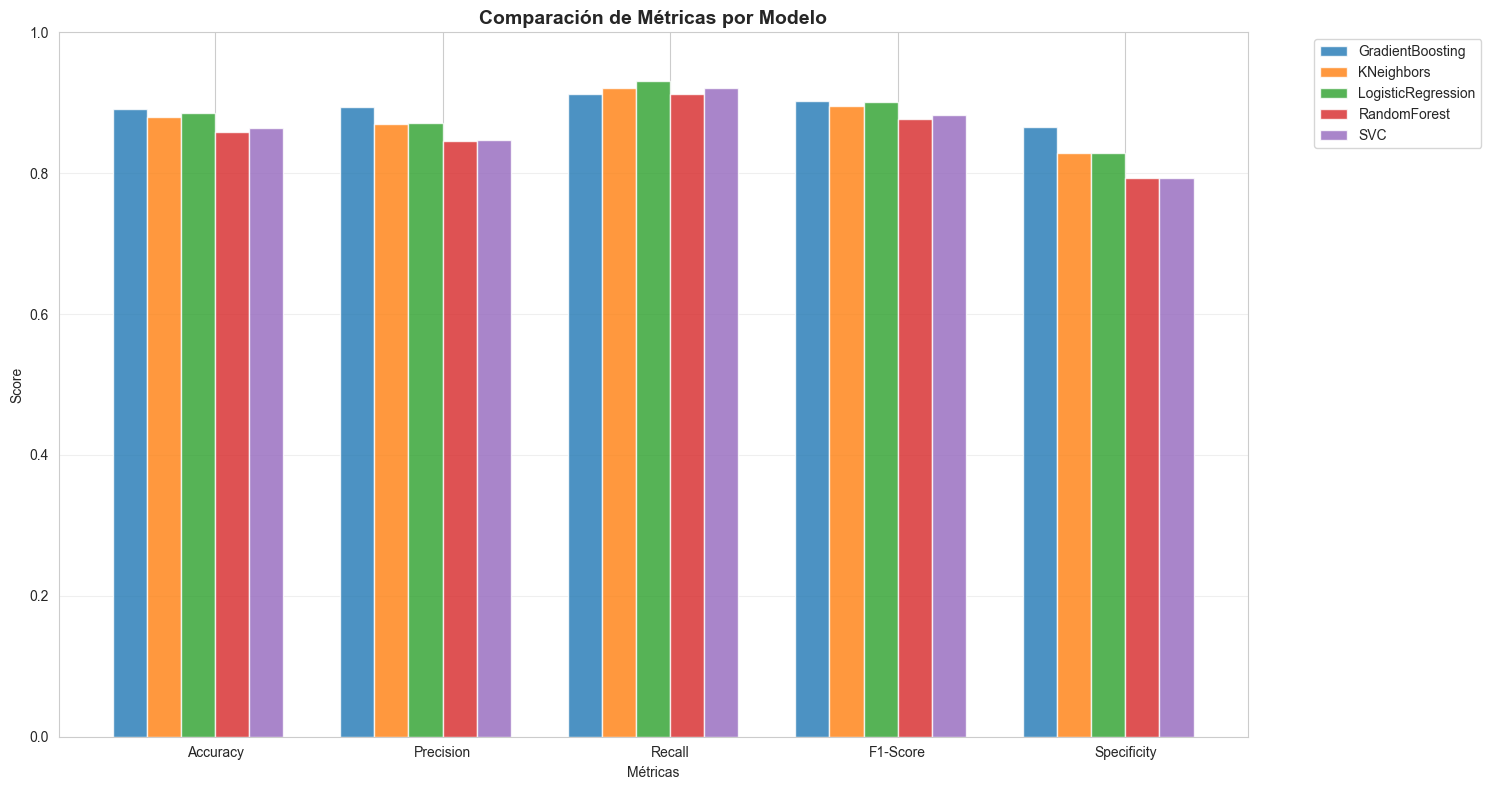

In [20]:
print("\nGRÁFICO RADAR DE MÉTRICAS MÚLTIPLES")

# Preparar datos para el gráfico radar
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
models = detailed_df['Model'].values
metrics_data = detailed_df[metrics_to_plot].values

# Crear gráfico de barras agrupadas
x = np.arange(len(metrics_to_plot))
width = 0.15

plt.figure(figsize=(15, 8))
for i, model in enumerate(models):
    offset = width * (i - len(models)/2)
    plt.bar(x + offset, metrics_data[i], width, label=model, alpha=0.8)

plt.xlabel('Métricas')
plt.ylabel('Score')
plt.title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
plt.xticks(x, metrics_to_plot)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [21]:
print("GUARDANDO MEJOR MODELO")

# Identificar mejor modelo
best_model_name = ranking_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

# Guardar modelo
import joblib
import os

# Crear directorio si no existe
os.makedirs('app', exist_ok=True)

# Guardar modelo
model_path = "app/model.joblib"
joblib.dump(best_model, model_path)

print(f"Mejor modelo guardado: {best_model_name}")
print(f"Ruta: {model_path}")
print(f"Parámetros: {results[best_model_name]['best_params']}")
print(f"Performance - AUC: {results[best_model_name]['auc']:.4f}, "
      f"Accuracy: {results[best_model_name]['accuracy']:.4f}")

GUARDANDO MEJOR MODELO
Mejor modelo guardado: GradientBoosting
Ruta: app/model.joblib
Parámetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 50}
Performance - AUC: 0.9372, Accuracy: 0.8913
